## Conjunto de Dados 1: Frutas 🍎

In [20]:
import pandas as pd

df = pd.read_excel('data/dados_frutas.xlsx')
df

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


Aplicando metodo apresentado na aula para descobrir a fruta

In [21]:
filtro_redonda = df['Arredondada'] == 1
filtro_suculenta = df['Suculenta'] == 1
filtro_vermelha = df['Vermelha'] == 1
filtro_doce = df['Doce'] == 1

df[filtro_redonda & filtro_suculenta & filtro_vermelha & filtro_doce]

,Arredondada,Suculenta,Vermelha,Doce,Fruta
4,1,1,1,1,Cereja
6,1,1,1,1,Maçã


Fazendo a maquina aprender

In [22]:
from sklearn import tree

features = ['Arredondada','Suculenta','Vermelha','Doce']
target = 'Fruta'

X = df[features]
y = df[target]

In [23]:
arvore = tree.DecisionTreeClassifier(random_state=42)
arvore.fit(X, y)

DecisionTreeClassifier(random_state=42)

[Text(0.4090909090909091, 0.875, 'Arredondada <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.18181818181818182, 0.625, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0, 0]\nclass = Banana'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.6363636363636364, 0.625, 'Vermelha <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 1, 0, 1, 1]\nclass = Cereja'),
 Text(0.45454545454545453, 0.375, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 1, 0]\nclass = Limão'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]\nclass = Pera'),
 Text(0.8181818181818182, 0.375, 'Doce <= 0.5\ngini = 0.667\

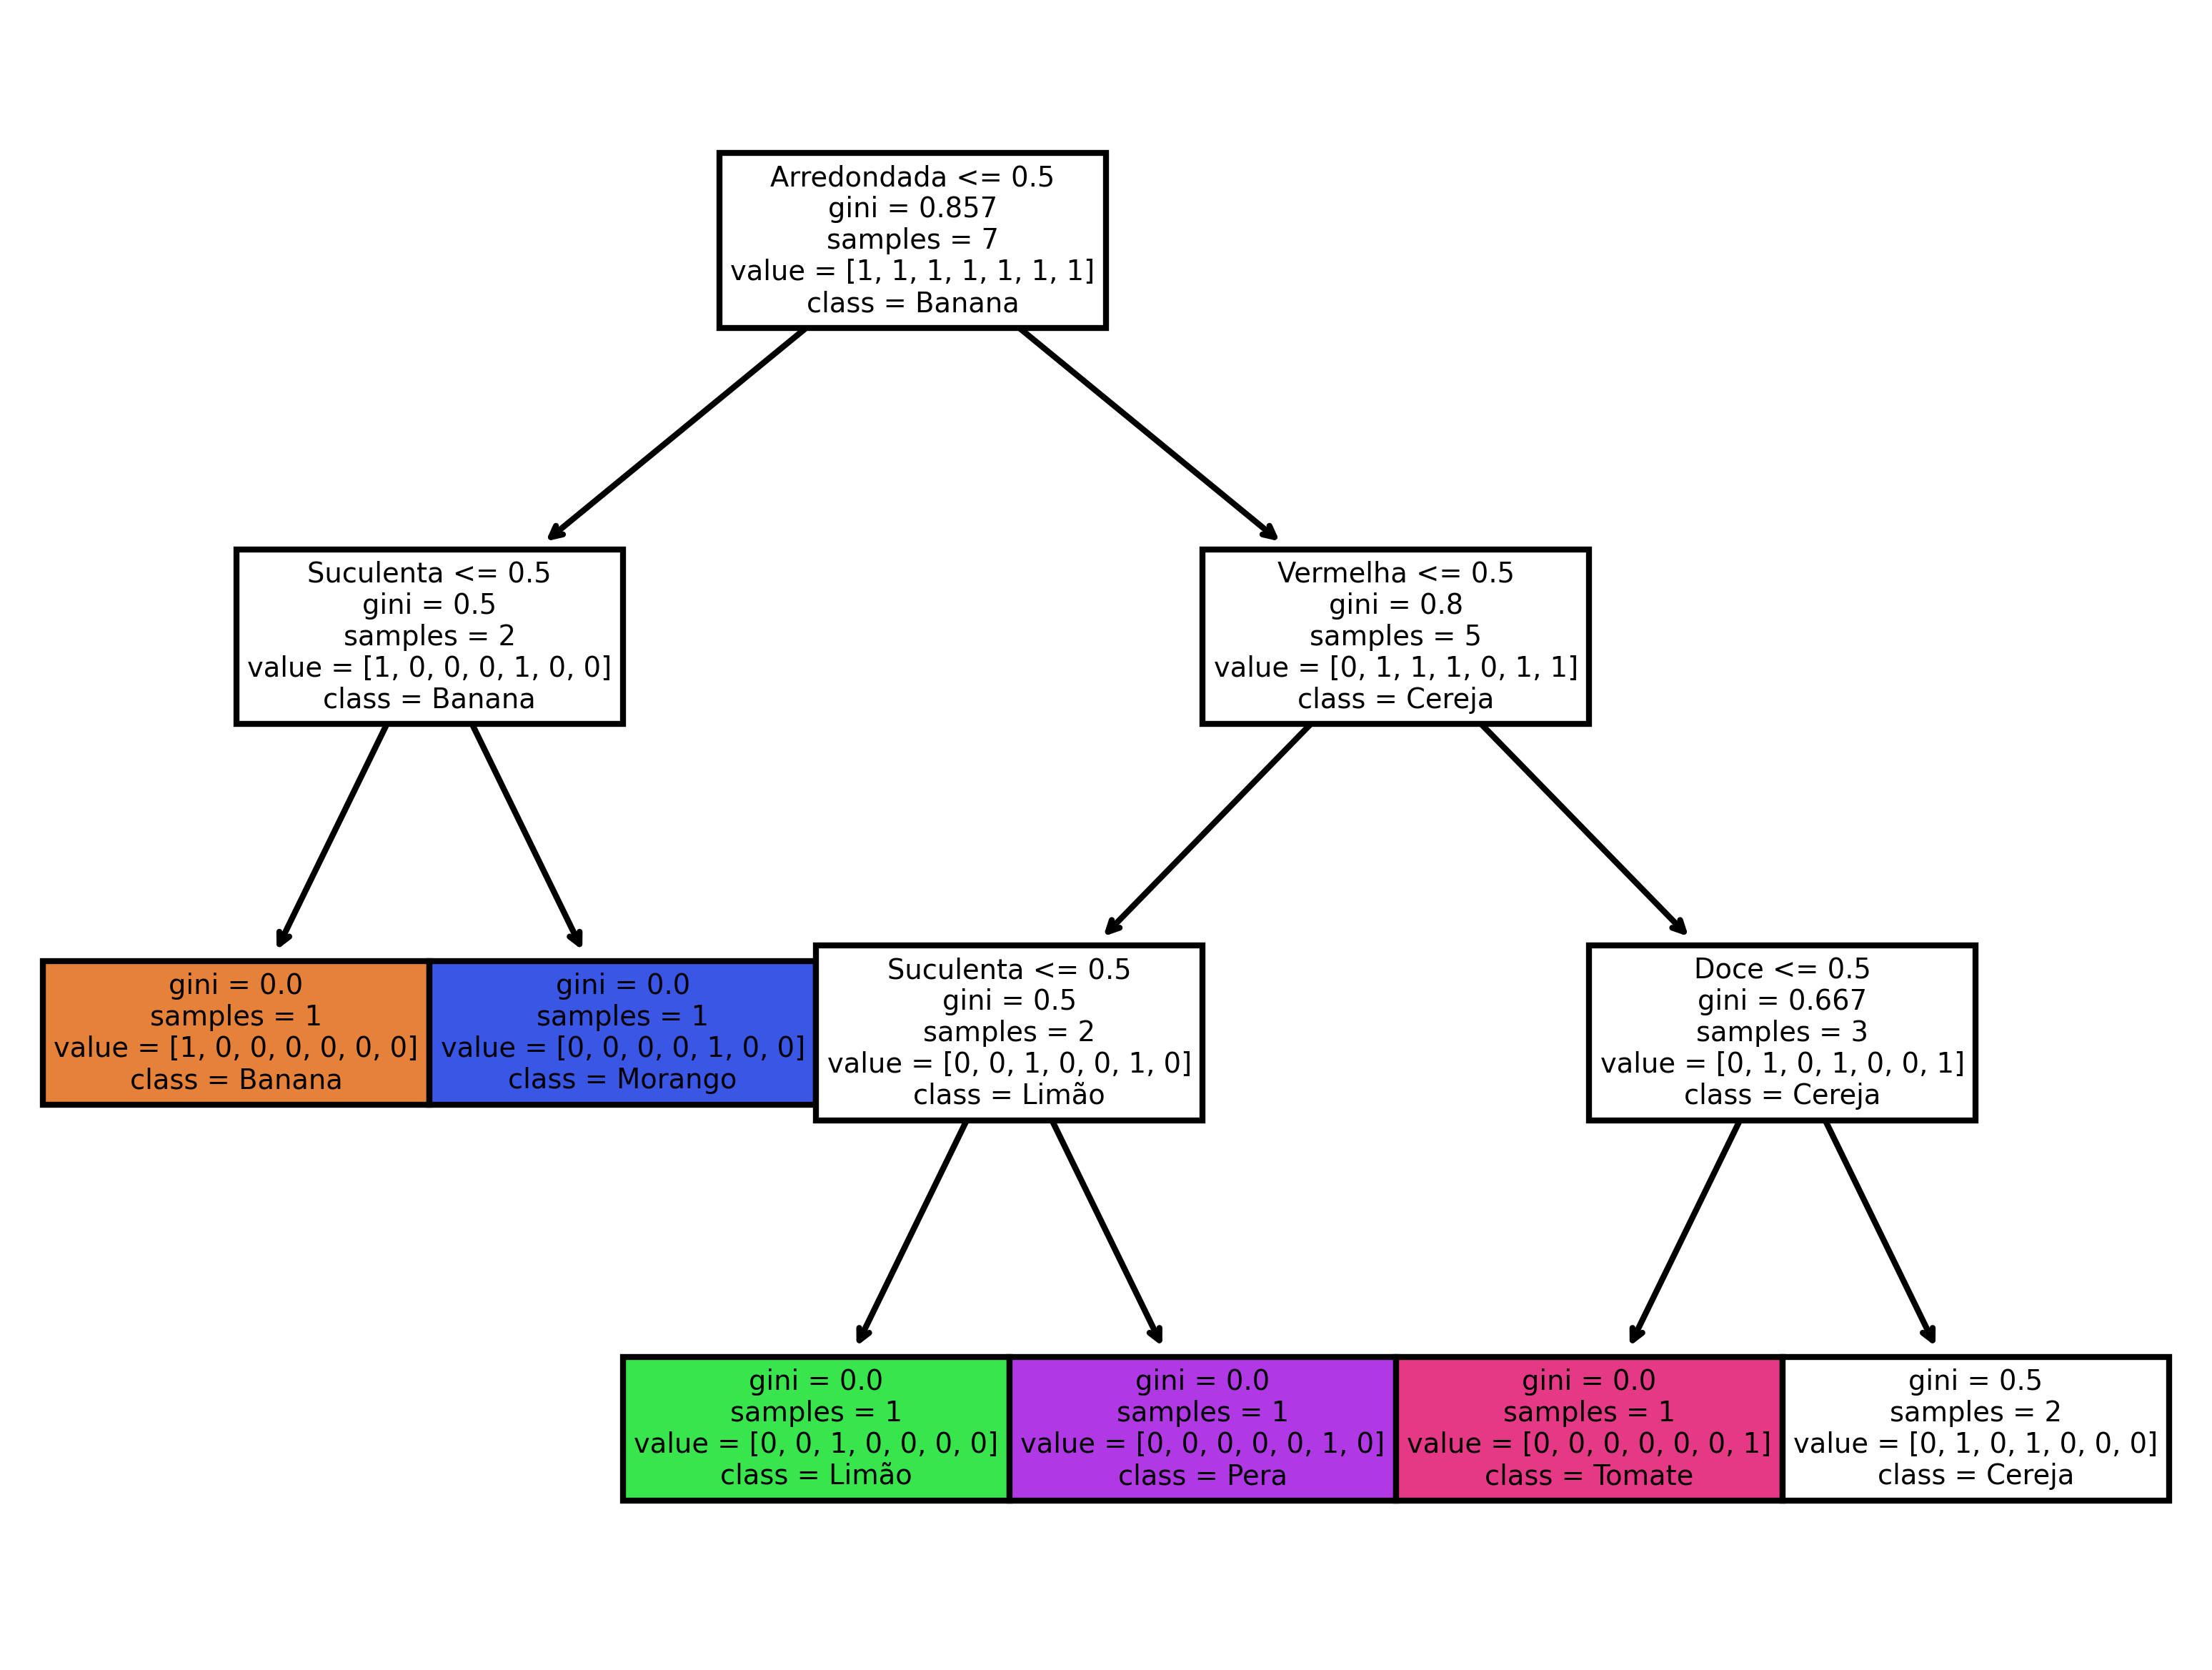

In [24]:
import matplotlib.pyplot as plt

plt.figure(dpi=600)

tree.plot_tree(arvore,
               class_names=list(arvore.classes_),
               feature_names=list(features),
               filled=True)

Prevendo o valor com a probabilidade

In [25]:
# ['Arredondada','Suculenta','Vermelha','Doce']
arvore.predict([[0,1,1,1]])

probas = arvore.predict_proba([[1,1,1,1]])[0]
pd.Series(probas, index=arvore.classes_)

c:\Users\lsantana\AppData\Local\anaconda3\envs\analysis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\lsantana\AppData\Local\anaconda3\envs\analysis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Banana     0.0
Cereja     0.5
Limão      0.0
Maçã       0.5
Morango    0.0
Pera       0.0
Tomate     0.0
dtype: float64

## Conjunto de Dados 2: Cervejas 🍻

In [26]:
df2 = pd.read_excel('data/dados_cerveja.xlsx')
df2

,id,temperatura,copo,espuma,cor,classe
0,1,-5,mud,não,escura,weissbier
1,2,-5,mud,sim,escura,weissbier
2,3,-1,pint,não,clara,weissbier
3,4,-1,pint,sim,clara,weissbier
4,5,-5,pint,não,escura,pale-ale
5,6,-5,pint,não,clara,pale-ale
6,7,-5,pint,sim,escura,pale-ale
7,8,-1,mud,não,clara,pilsen
8,9,-5,mud,não,clara,pilsen
9,10,-1,mud,sim,clara,pilsen


Preparando os dados

In [27]:
features = ["temperatura","copo","espuma","cor"]
target = "classe"

X2 = df2[features]
y2 = df2[target]

X2 = X2.replace({
    "mud":1, "pint":0,
    "sim":1, "não":0,
    "escura":1, "clara":0,    
})

X2

,temperatura,copo,espuma,cor
0,-5,1,0,1
1,-5,1,1,1
2,-1,0,0,0
3,-1,0,1,0
4,-5,0,0,1
5,-5,0,0,0
6,-5,0,1,1
7,-1,1,0,0
8,-5,1,0,0
9,-1,1,1,0


In [28]:
arvore2 = tree.DecisionTreeClassifier(random_state=42)
arvore2.fit(X2, y2)

DecisionTreeClassifier(random_state=42)

[Text(0.5, 0.875, 'copo <= 0.5\ngini = 0.653\nsamples = 12\nvalue = [3, 5, 4]\nclass = pilsen'),
 Text(0.25, 0.625, 'temperatura <= -3.0\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2]\nclass = pale-ale'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = pale-ale'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = weissbier'),
 Text(0.75, 0.625, 'temperatura <= -3.0\ngini = 0.408\nsamples = 7\nvalue = [0, 5, 2]\nclass = pilsen'),
 Text(0.625, 0.375, 'cor <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = weissbier'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = pilsen'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = weissbier'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = pilsen')]

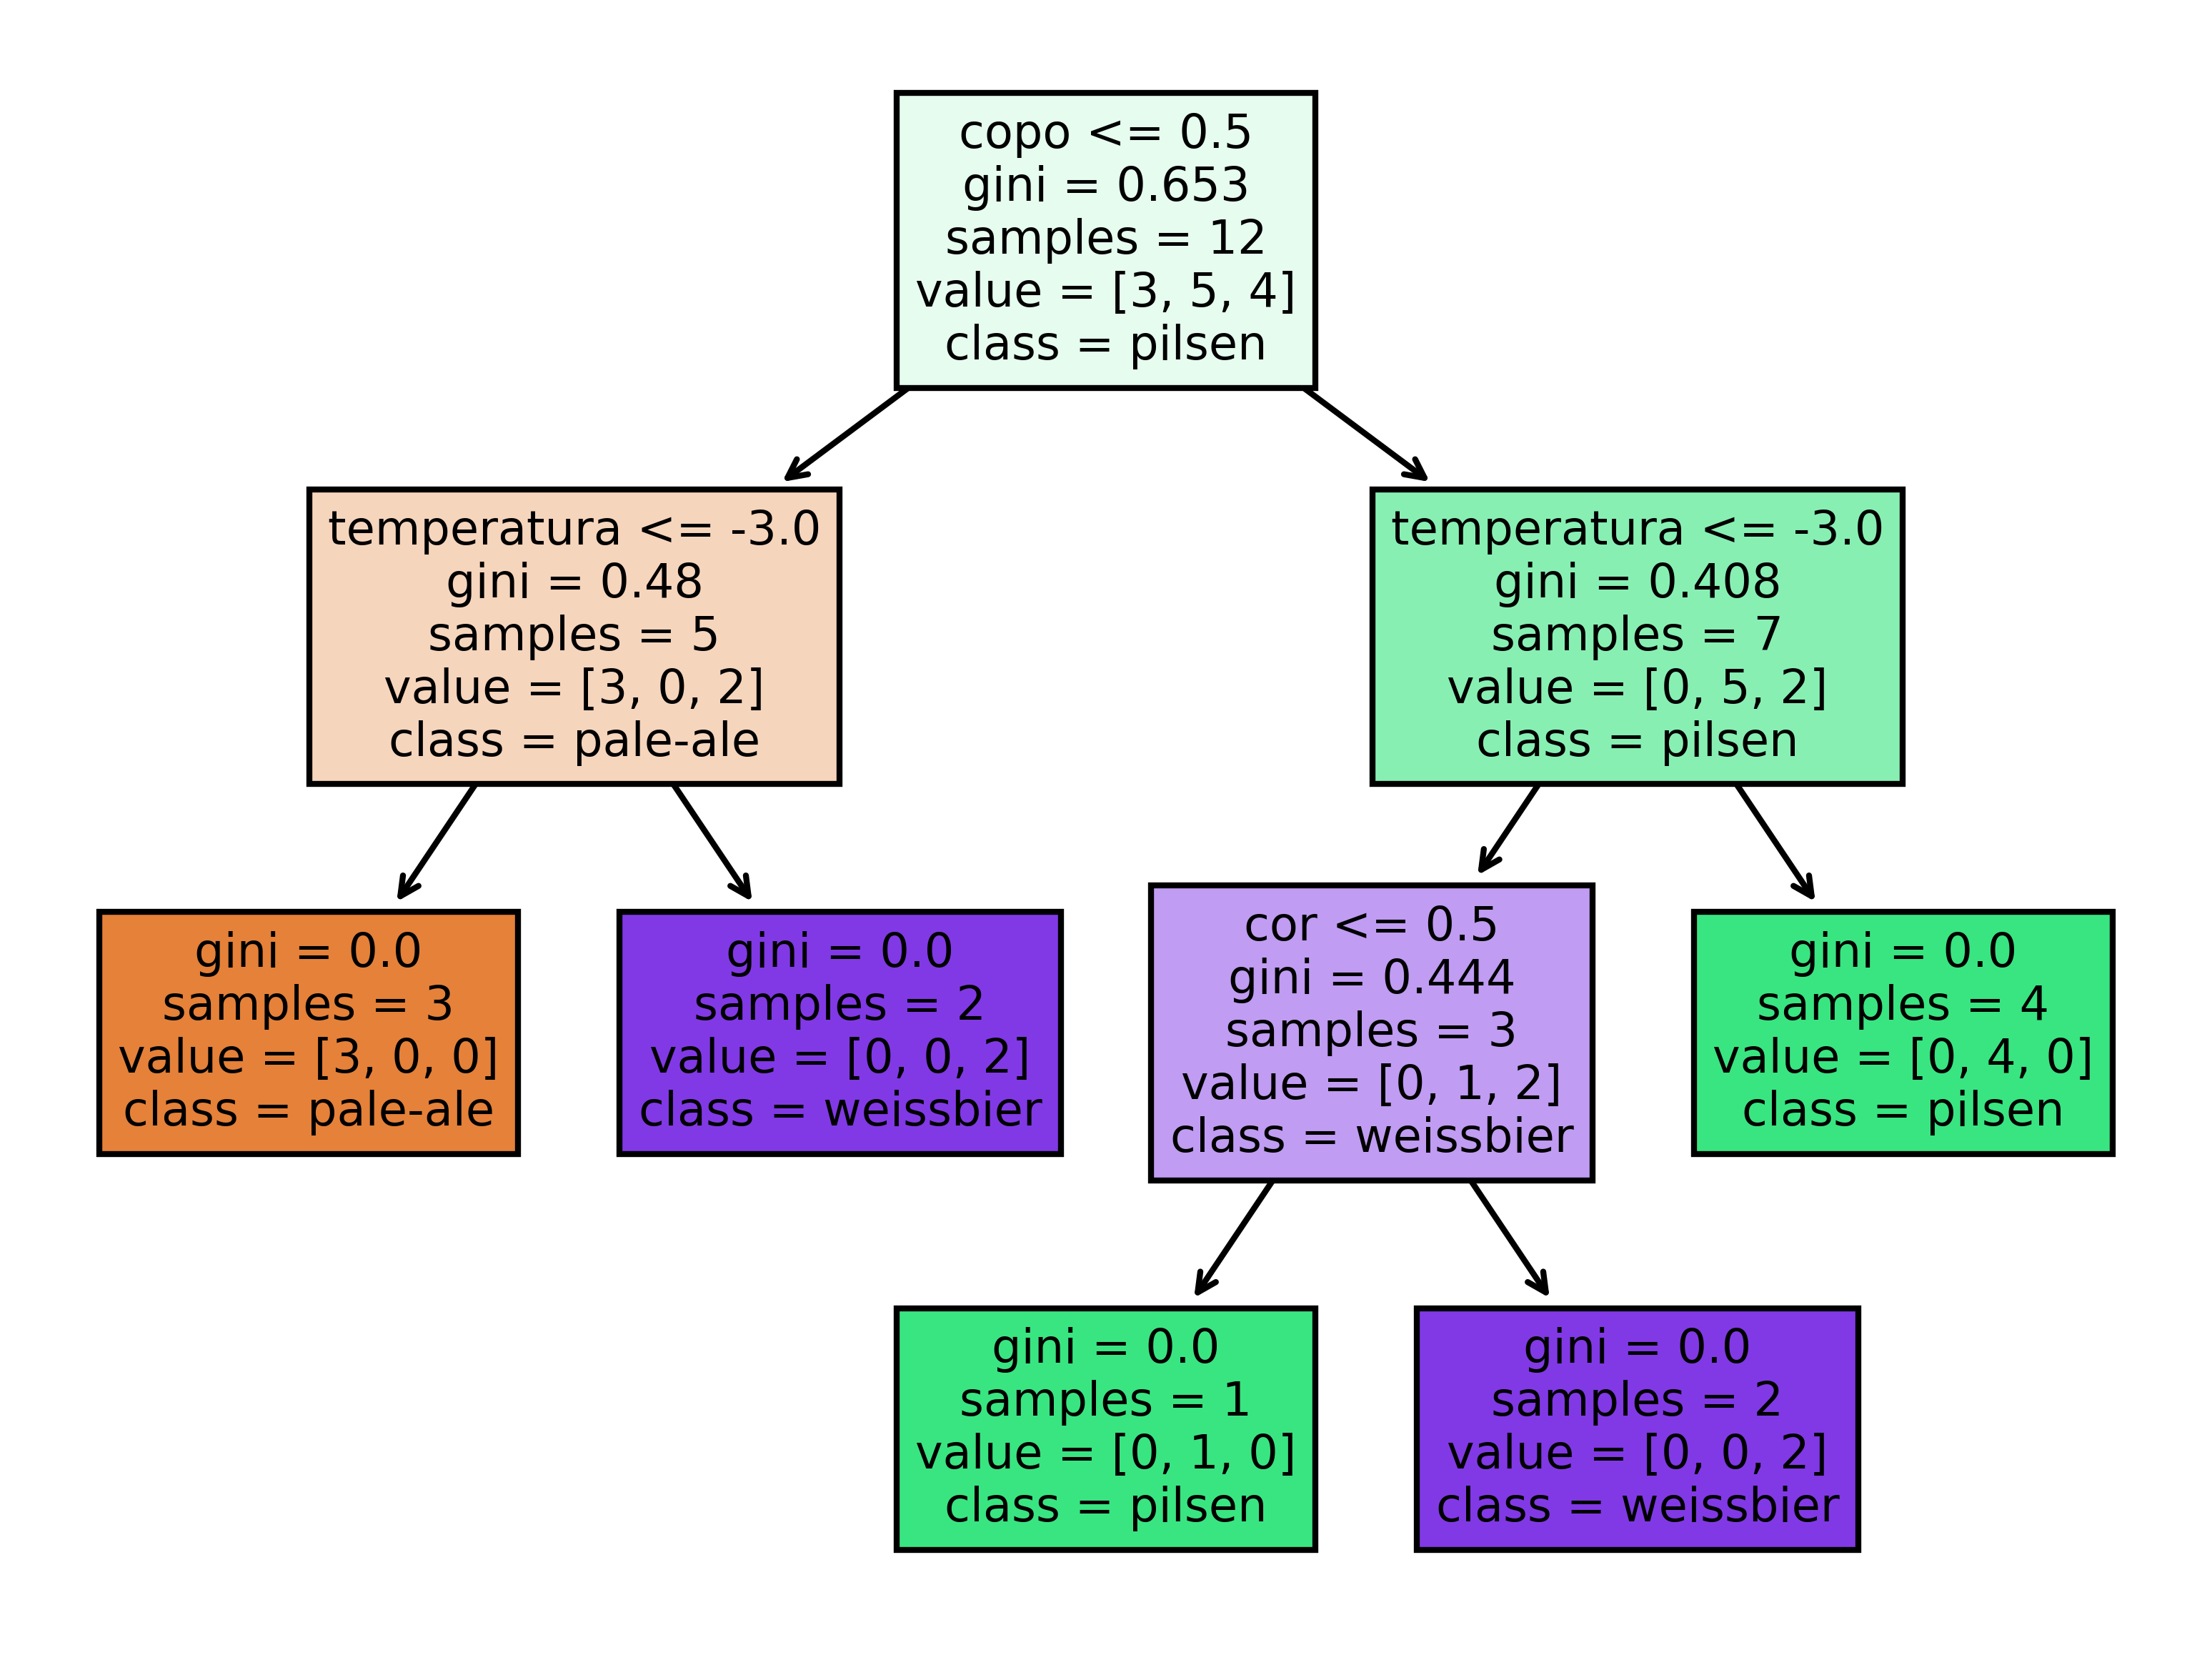

In [29]:
plt.figure(dpi=600)

tree.plot_tree(arvore2,
               class_names=list(arvore2.classes_),
               feature_names=list(features),
               filled=True)

In [30]:
probas2 = arvore2.predict_proba([[-5, 1, 0, 1]])[0]

pd.Series(probas2, index=arvore2.classes_)

c:\Users\lsantana\AppData\Local\anaconda3\envs\analysis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


pale-ale     0.0
pilsen       0.0
weissbier    1.0
dtype: float64